In [3]:
!pip install opencv-python
!pip install opencv-python-headless
!pip install deepface
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 50.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=6a6bc4a9e769e6310070fb23b6c5dff111bc232f174f6d1a18149bd4e6bda983
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [4]:
import cv2
print(cv2.__version__)

4.10.0


In [5]:
from deepface import DeepFace
print(DeepFace)


24-09-29 10:53:14 - Directory /root/.deepface has been created
24-09-29 10:53:14 - Directory /root/.deepface/weights has been created
<module 'deepface.DeepFace' from '/usr/local/lib/python3.10/dist-packages/deepface/DeepFace.py'>


In [6]:
!python --version

Python 3.10.12


In [7]:
!pip install opencv-python
!pip install opencv-python-headless
!pip install deepface


In [8]:
import sys
print(sys.executable)


/usr/bin/python3


In [9]:
# Function to analyze the frame and predict age, gender, and emotion
def analyze_frame(frame):
    # Analyze the frame using DeepFace for age, gender, and emotion
    try:
        # Analyze with DeepFace, enforcing detection set to False for smooth performance
        result = DeepFace.analyze(frame, actions=['age', 'gender', 'emotion'], enforce_detection=False)

        # Extracting data from result
        gender = result['gender']
        age = result['age']
        emotion = result['dominant_emotion']

        # Font for displaying text
        font = cv2.FONT_HERSHEY_SIMPLEX

        # Adding text on the frame for age, gender, and emotion
        cv2.putText(frame, f'Gender: {gender}', (50, 50), font, 0.7, (255, 255, 255), 2)
        cv2.putText(frame, f'Age: {age}', (50, 80), font, 0.7, (255, 255, 255), 2)
        cv2.putText(frame, f'Emotion: {emotion}', (50, 110), font, 0.7, (255, 255, 255), 2)

    except Exception as e:
        # Print any errors that occur during analysis
        print(f"Error: {e}")



In [10]:
# Initialize the webcam (0 is usually the default camera)
cap = cv2.VideoCapture(0)

# Continuously capture frames from the webcam
while True:
    ret, frame = cap.read()  # Capture frame-by-frame

    if not ret:
        print("Failed to grab frame")
        break

    # Analyze the frame
    analyze_frame(frame)

    # Display the frame with predictions
    cv2.imshow('Age, Gender, and Emotion Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture when done
cap.release()
cv2.destroyAllWindows()


Failed to grab frame


In [11]:
!pip install ipywidgets


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [12]:
import cv2
from deepface import DeepFace
import ipywidgets as widgets
from IPython.display import display, Image, Video

# Create file upload widgets for images and videos
image_upload = widgets.FileUpload(accept='image/*', multiple=False)
video_upload = widgets.FileUpload(accept='video/*', multiple=False)

# Display the upload widgets
display(image_upload, video_upload)

def analyze_image(uploaded_file):
    # Read the image from the uploaded file
    for filename in uploaded_file:
        content = uploaded_file[filename]['content']
        image = cv2.imdecode(np.frombuffer(content, np.uint8), cv2.IMREAD_COLOR)

        # Analyze the image using DeepFace
        result = DeepFace.analyze(image, actions=['age', 'gender', 'emotion'], enforce_detection=False)

        # Display results
        print(f"Results for {filename}:")
        print(f"Gender: {result['gender']}")
        print(f"Age: {result['age']}")
        print(f"Emotion: {result['dominant_emotion']}")

        # Display the image with predictions
        cv2.imshow('Analyzed Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

def analyze_video(uploaded_file):
    # Read the video from the uploaded file
    for filename in uploaded_file:
        content = uploaded_file[filename]['content']
        with open("/content/20210319_221240.mp4", "wb") as f:
            f.write(content)

        cap = cv2.VideoCapture("/content/20210319_221240.mp4")

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Analyze each frame
            analyze_frame(frame)

            # Display the frame with predictions
            cv2.imshow('Video Frame', frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

# Bind the upload functions to the upload widgets
image_upload.observe(lambda change: analyze_image(image_upload.value), names='value')
video_upload.observe(lambda change: analyze_video(video_upload.value), names='value')


FileUpload(value={}, accept='image/*', description='Upload')

FileUpload(value={}, accept='video/*', description='Upload')

In [13]:
!pip install opencv-python
!pip install deepface
!pip install numpy
!pip install ipywidgets
!pip install requests


In [14]:
import cv2
from deepface import DeepFace
import numpy as np
import requests
from IPython.display import display
import ipywidgets as widgets

# Create a text input widget for the image URL
url_input = widgets.Text(
    value='',
    placeholder='Enter image URL here',
    description='Image URL:',
    disabled=False
)

# Create a button to trigger analysis
analyze_button = widgets.Button(description="Analyze Image")

# Function to analyze image from URL
def analyze_image(url):
    try:
        # Fetch the image from the URL
        response = requests.get(url)
        image_array = np.array(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

        # Analyze the image using DeepFace
        result = DeepFace.analyze(image, actions=['age', 'gender', 'emotion'], enforce_detection=False)

        # Display results
        print(f"Results for {url}:")
        print(f"Gender: {result['gender']}")
        print(f"Age: {result['age']}")
        print(f"Emotion: {result['dominant_emotion']}")

        # Display the image with predictions
        cv2.imshow('Analyzed Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    except Exception as e:
        print(f"An error occurred: {e}")

# Define the button click event
def on_analyze_button_click(b):
    analyze_image(url_input.value)

# Bind the button click event to the function
analyze_button.on_click(on_analyze_button_click)

# Display the URL input and analyze button
display(url_input, analyze_button)


Text(value='', description='Image URL:', placeholder='Enter image URL here')

Button(description='Analyze Image', style=ButtonStyle())

An error occurred: img must be numpy array or str but it is <class 'NoneType'>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import cv2
from deepface import DeepFace
import numpy as np
import requests
import ipywidgets as widgets
from IPython.display import display

# Create a text input widget for the image URL
url_input = widgets.Text(
    value='',
    placeholder='Enter image URL here',
    description='Image URL:',
    disabled=False
)

# Create a button to trigger analysis
analyze_button = widgets.Button(description="Analyze Image")

# Function to analyze image from URL
def analyze_image(url):
    try:
        # Fetch the image from the URL
        response = requests.get(url)
        if response.status_code != 200:
            print("Failed to retrieve the image. Check the URL.")
            return

        # Convert the response content to an image
        image_array = np.array(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

        # Analyze the image using DeepFace
        result = DeepFace.analyze(image, actions=['age', 'gender', 'emotion'], enforce_detection=False)

        # Display results
        print(f"Results for {url}:")
        for res in result:
            print(f"Gender: {res['gender']}")
            print(f"Age: {res['age']}")
            print(f"Emotion: {res['dominant_emotion']}")

        # Display the image with predictions
        cv2.imshow('Analyzed Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    except Exception as e:
        print(f"An error occurred: {e}")

# Define the button click event
def on_analyze_button_click(b):
    analyze_image(url_input.value)

# Bind the button click event to the function
analyze_button.on_click(on_analyze_button_click)

# Display the URL input and analyze button
display(url_input, analyze_button)


Text(value='', description='Image URL:', placeholder='Enter image URL here')

Button(description='Analyze Image', style=ButtonStyle())

In [16]:
import cv2
from deepface import DeepFace
import numpy as np
import requests
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Create a text input widget for the image URL
url_input = widgets.Text(
    value='',
    placeholder='Enter image URL here',
    description='Image URL:',
    disabled=False
)

# Create a button to trigger analysis
analyze_button = widgets.Button(description="Analyze Image")

# Function to analyze image from URL
def analyze_image(url):
    try:
        # Fetch the image from the URL
        response = requests.get(url)
        if response.status_code != 200:
            print("Failed to retrieve the image. Check the URL.")
            return

        # Convert the response content to an image
        image_array = np.array(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

        # Check if the image was loaded correctly
        if image is None:
            print("The image could not be loaded. Please check the URL.")
            return

        # Analyze the image using DeepFace
        result = DeepFace.analyze(image, actions=['age', 'gender', 'emotion'], enforce_detection=False)

        # Display results
        print(f"Results for {url}:")
        for res in result:
            print(f"Gender: {res['gender']}")
            print(f"Age: {res['age']}")
            print(f"Emotion: {res['dominant_emotion']}")

        # Display the image with predictions using Matplotlib
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Turn off axis numbers and ticks
        plt.show()  # Display the image

    except Exception as e:
        print(f"An error occurred: {e}")

# Define the button click event
def on_analyze_button_click(b):
    analyze_image(url_input.value)

# Bind the button click event to the function
analyze_button.on_click(on_analyze_button_click)

# Display the URL input and analyze button
display(url_input, analyze_button)


Text(value='', description='Image URL:', placeholder='Enter image URL here')

Button(description='Analyze Image', style=ButtonStyle())

An error occurred: Invalid URL '/istockphoto-1368965646-612x612.jpg': No scheme supplied. Perhaps you meant https:///istockphoto-1368965646-612x612.jpg?
An error occurred: Invalid URL '/istockphoto-1368965646-612x612.jpg': No scheme supplied. Perhaps you meant https:///istockphoto-1368965646-612x612.jpg?


Text(value='', description='Image URL:', placeholder='Enter image URL here')

FileUpload(value={}, accept='.jpg,.jpeg,.png', description='Upload Image')

Button(description='Analyze Image', style=ButtonStyle())

An error occurred while fetching the image: Invalid URL 'http:///istockphoto-1368965646-612x612.jpg': No host supplied
The image could not be loaded. Please check the input.
An error occurred while fetching the image: Invalid URL 'http:///istockphoto-1368965646-612x612.jpg': No host supplied
The image could not be loaded. Please check the input.
An error occurred while fetching the image: Invalid URL 'http:///istockphoto-1368965646-612x612.jpg': No host supplied
The image could not be loaded. Please check the input.
An error occurred while fetching the image: Invalid URL 'http:///istockphoto-1368965646-612x612.jpg': No host supplied
The image could not be loaded. Please check the input.
An error occurred while fetching the image: Invalid URL 'http:///istockphoto-1368965646-612x612.jpg': No host supplied
The image could not be loaded. Please check the input.
An error occurred while fetching the image: Invalid URL 'http:///istockphoto-1368965646-612x612.jpg': No host supplied
The image c

Action: age:   0%|          | 0/3 [00:00<?, ?it/s]    

24-09-29 11:01:47 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 11.0M/539M [00:00<00:06, 83.1MB/s]
  5%|▌         | 29.4M/539M [00:00<00:03, 135MB/s] 
  8%|▊         | 44.0M/539M [00:00<00:04, 123MB/s]
 11%|█         | 60.3M/539M [00:00<00:03, 136MB/s]
 14%|█▍        | 74.4M/539M [00:00<00:03, 131MB/s]
 17%|█▋        | 92.3M/539M [00:00<00:03, 146MB/s]
 20%|█▉        | 107M/539M [00:00<00:03, 134MB/s] 
 23%|██▎       | 126M/539M [00:00<00:03, 133MB/s]
 26%|██▋       | 143M/539M [00:01<00:02, 140MB/s]
 29%|██▉       | 158M/539M [00:01<00:02, 136MB/s]
 33%|███▎      | 176M/539M [00:01<00:02, 149MB/s]
 36%|███▌      | 191M/539M [00:01<00:02, 138MB/s]
 38%|███▊      | 206M/539M [00:01<00:02, 140MB/s]
 41%|████      | 221M/539M [00:01<00:02, 137MB/s]
 45%|████▍     | 241M/539M [00:01<00:01, 154MB/s]
 48%|████▊     | 256M/539M [00:01<00:01

24-09-29 11:01:58 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:05, 88.6MB/s]
  5%|▌         | 27.3M/537M [00:00<00:04, 127MB/s] 
  8%|▊         | 42.5M/537M [00:00<00:04, 121MB/s]
 11%|█         | 58.2M/537M [00:00<00:03, 131MB/s]
 13%|█▎        | 72.4M/537M [00:00<00:03, 134MB/s]
 16%|█▌        | 86.0M/537M [00:00<00:03, 128MB/s]
 18%|█▊        | 99.1M/537M [00:00<00:03, 127MB/s]
 21%|██        | 114M/537M [00:00<00:03, 132MB/s] 
 25%|██▍       | 132M/537M [00:00<00:02, 147MB/s]
 27%|██▋       | 147M/537M [00:01<00:02, 135MB/s]
 30%|███       | 164M/537M [00:01<00:02, 142MB/s]
 33%|███▎      | 179M/537M [00:01<00:02, 138MB/s]
 36%|███▌      | 194M/537M [00:01<00:02, 141MB/s]
 39%|███▉      | 210M/537M [00:01<00:02, 141MB/s]
 43%|████▎     | 231M/537M [00:01<00:02, 143MB/s]
 47%|████▋     | 252M/537M [00:0

24-09-29 11:02:08 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

100%|██████████| 5.98M/5.98M [00:00<00:00, 91.5MB/s]
Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Results:
Gender: {'Woman': 6.864548474550247, 'Man': 93.13545227050781}
Age: 25
Emotion: fear
Gender: {'Woman': 99.67183470726013, 'Man': 0.3281588200479746}
Age: 30
Emotion: happy
Gender: {'Woman': 60.14023423194885, 'Man': 39.85976278781891}
Age: 25
Emotion: fear


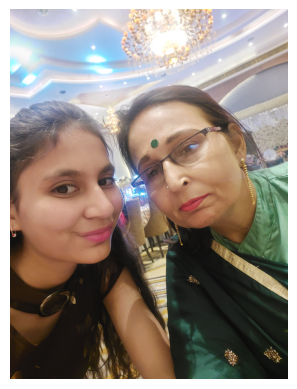

Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Results:
Gender: {'Woman': 6.864548474550247, 'Man': 93.13545227050781}
Age: 25
Emotion: fear
Gender: {'Woman': 99.67183470726013, 'Man': 0.3281588200479746}
Age: 30
Emotion: happy
Gender: {'Woman': 60.14023423194885, 'Man': 39.85976278781891}
Age: 25
Emotion: fear


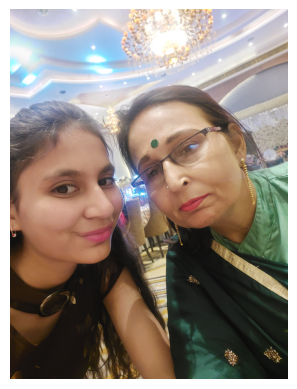

Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]


Results:
Gender: {'Woman': 6.864548474550247, 'Man': 93.13545227050781}
Age: 25
Emotion: fear
Gender: {'Woman': 99.67183470726013, 'Man': 0.3281588200479746}
Age: 30
Emotion: happy
Gender: {'Woman': 60.14023423194885, 'Man': 39.85976278781891}
Age: 25
Emotion: fear


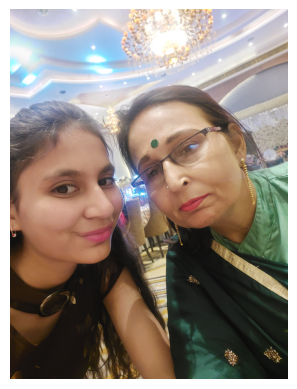

In [17]:
import cv2
from deepface import DeepFace
import numpy as np
import requests
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import io

# Create a text input widget for the image URL
url_input = widgets.Text(
    value='',
    placeholder='Enter image URL here',
    description='Image URL:',
    disabled=False
)

# Create a file upload widget
file_upload = widgets.FileUpload(
    description='Upload Image',
    accept='.jpg,.jpeg,.png',
    multiple=False  # Allow single file upload
)

# Create a button to trigger analysis
analyze_button = widgets.Button(description="Analyze Image")

# Function to analyze image from URL
def analyze_image_from_url(url):
    # Prepend 'http://' if the URL does not start with 'http://' or 'https://'
    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url

    try:
        # Fetch the image from the URL
        response = requests.get(url)
        if response.status_code != 200:
            print("Failed to retrieve the image. Check the URL.")
            return

        # Convert the response content to an image
        image_array = np.array(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

        return image

    except Exception as e:
        print(f"An error occurred while fetching the image: {e}")
        return None

# Function to analyze the uploaded file
def analyze_image_from_file(uploaded_file):
    # Read the uploaded file content
    image_data = uploaded_file[list(uploaded_file.keys())[0]]['content']
    image_array = np.array(bytearray(image_data), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    return image

# Function to analyze the image (either from URL or uploaded file)
def analyze_image():
    # Try to get the image from the URL
    if url_input.value:
        image = analyze_image_from_url(url_input.value)
    # Try to get the image from the uploaded file
    elif file_upload.value:
        image = analyze_image_from_file(file_upload.value)
    else:
        print("Please enter a URL or upload an image.")
        return

    # Check if the image was loaded correctly
    if image is None:
        print("The image could not be loaded. Please check the input.")
        return

    # Analyze the image using DeepFace
    result = DeepFace.analyze(image, actions=['age', 'gender', 'emotion'], enforce_detection=False)

    # Display results
    print(f"Results:")
    for res in result:
        print(f"Gender: {res['gender']}")
        print(f"Age: {res['age']}")
        print(f"Emotion: {res['dominant_emotion']}")

    # Display the image with predictions using Matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()  # Display the image

# Define the button click event
def on_analyze_button_click(b):
    analyze_image()

# Bind the button click event to the function
analyze_button.on_click(on_analyze_button_click)

# Display the URL input, file upload, and analyze button
display(url_input, file_upload, analyze_button)


FileUpload(value={}, accept='.jpg,.jpeg,.png', description='Upload Image')

Button(description='Analyze Image', style=ButtonStyle())

Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]


Results:
Gender: {'Woman': 0.0015963634723448195, 'Man': 99.99840259552002}
Age: 36
Emotion: happy
Gender: {'Woman': 98.05269241333008, 'Man': 1.9473019987344742}
Age: 49
Emotion: happy
Gender: {'Woman': 18.996840715408325, 'Man': 81.00315928459167}
Age: 31
Emotion: neutral
Gender: {'Woman': 6.422025710344315, 'Man': 93.57796907424927}
Age: 24
Emotion: neutral


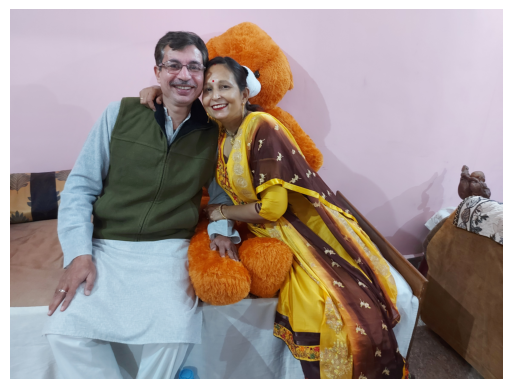

Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]


Results:
Gender: {'Woman': 0.0015963634723448195, 'Man': 99.99840259552002}
Age: 36
Emotion: happy
Gender: {'Woman': 98.05269241333008, 'Man': 1.9473019987344742}
Age: 49
Emotion: happy
Gender: {'Woman': 18.996840715408325, 'Man': 81.00315928459167}
Age: 31
Emotion: neutral
Gender: {'Woman': 6.422025710344315, 'Man': 93.57796907424927}
Age: 24
Emotion: neutral


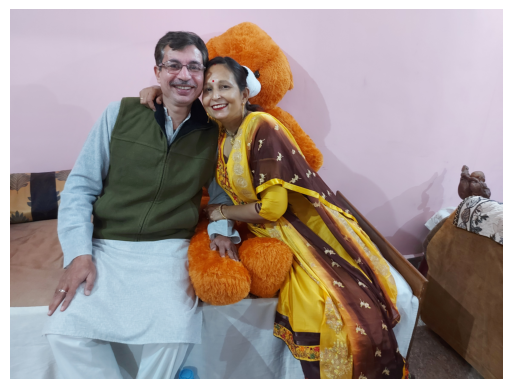

In [18]:
import cv2
from deepface import DeepFace
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Create a file upload widget
file_upload = widgets.FileUpload(
    description='Upload Image',
    accept='.jpg,.jpeg,.png',
    multiple=False  # Allow single file upload
)

# Create a button to trigger analysis
analyze_button = widgets.Button(description="Analyze Image")

# Function to analyze the uploaded file
def analyze_image_from_file(uploaded_file):
    # Read the uploaded file content
    image_data = uploaded_file[list(uploaded_file.keys())[0]]['content']
    image_array = np.array(bytearray(image_data), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    return image

# Function to analyze the image (from uploaded file)
def analyze_image():
    # Check if the uploaded file is present
    if file_upload.value:
        image = analyze_image_from_file(file_upload.value)
    else:
        print("Please upload an image.")
        return

    # Check if the image was loaded correctly
    if image is None:
        print("The image could not be loaded. Please check the uploaded file.")
        return

    # Analyze the image using DeepFace
    result = DeepFace.analyze(image, actions=['age', 'gender', 'emotion'], enforce_detection=False)

    # Display results
    print(f"Results:")
    for res in result:
        print(f"Gender: {res['gender']}")
        print(f"Age: {res['age']}")
        print(f"Emotion: {res['dominant_emotion']}")

    # Display the image with predictions using Matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()  # Display the image

# Define the button click event
def on_analyze_button_click(b):
    analyze_image()

# Bind the button click event to the function
analyze_button.on_click(on_analyze_button_click)

# Display the file upload and analyze button
display(file_upload, analyze_button)
